## 作業
在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，並回答下列問題。
* Q1: 透過數值法計算  Age 和  Survived  是否有相關性?
* Q2:透過數值法計算  Sex 和 Survived  是否有相關性?
* Q3: 透過數值法計算  Age 和  Fare 是否有相關性?   
* 提示:    
1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態      
2.把題目中的 Survived 用 Survived_cate 來做分析       
3.首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。     


In [3]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

import pingouin as pg
import researchpy   
%matplotlib inline

## 讀入資料

In [4]:
df_train = pd.read_csv("Titanic_train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# 刪除有遺失值的列資料
df_train = df_train.dropna()
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB
None


In [6]:
## 這邊我們做一個調整，把 Survived 變成離散型變數 Survived_cate
df_train["Survived_cate"] = pd.Categorical(df_train["Survived"], df_train["Survived"].unique())
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    183 non-null    int64   
 1   Survived       183 non-null    int64   
 2   Pclass         183 non-null    int64   
 3   Name           183 non-null    object  
 4   Sex            183 non-null    object  
 5   Age            183 non-null    float64 
 6   SibSp          183 non-null    int64   
 7   Parch          183 non-null    int64   
 8   Ticket         183 non-null    object  
 9   Fare           183 non-null    float64 
 10  Cabin          183 non-null    object  
 11  Embarked       183 non-null    object  
 12  Survived_cate  183 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 18.9+ KB
None


###  Q1: 透過數值法計算  Age 和  Survived  是否有相關性?


### Q2:透過數值法計算  Sex 和 Survived  是否有相關性?


### Q3: 透過數值法計算  Age 和  Fare 是否有相關性?  

In [7]:
# Q1: 透過數值法計算 Age 和 Survived 是否有相關性?
aov = pg.anova(dv="Age", between="Survived_cate", data=df_train, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Survived_cate,2875.522529,1,2875.522529,12.491639,0.000519,0.064559
1,Within,41665.436185,181,230.195780,NaN,NaN,NaN


In [8]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
etaSq

0.06455906231842591

In [9]:
def judge_etaSq(etaSq):
    if etaSq < 0.01:
        qual = "negligible"
    elif etaSq < 0.06:
        qual = "small"
    elif etaSq < 0.14:
        qual = "Medium"
    else:
        qual = "Large"
    return qual
judge_etaSq(etaSq)

'Medium'

In [10]:
# Q2:透過數值法計算 Sex 和 Survived 是否有相關性?
contTable = pd.crosstab(df_train["Sex"], df_train["Survived_cate"])
contTable

Survived_cate,1,0
Sex,,
female,82,6
male,41,54


In [11]:
df = min(contTable.shape[0], contTable.shape[1]) - 1
df

1

In [12]:
crosstab, res = researchpy.crosstab(df_train["Sex"], df_train["Survived_cate"], test="chi-square")
print("Cramer's value is", res.loc[2, "results"])

Cramer's value is 0.5324


In [13]:
def judgment_CramerV(df,V):
    if df == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return(qual)

judgment_CramerV(df,res.loc[2,'results'])

'large'

In [14]:
# Q3: 透過數值法計算 Age 和 Fare 是否有相關性?
corr, _ = stats.pearsonr(df_train["Age"], df_train["Fare"])
print(corr)
# 二者略呈負相關

-0.09242385620999947


C:\Users\benao\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


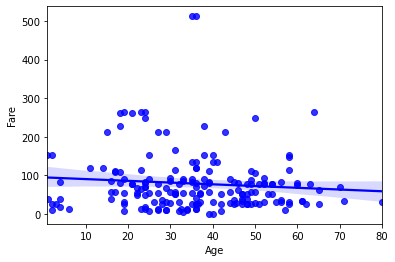

In [15]:
g = sns.regplot("Age", "Fare", data=df_train, color="b")
# 異常值似乎沒有對迴歸線的斜率造成太大的槓桿作用